## 七月在线机器学习实训营三期第六周(机器学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月16日至3月18日期间完成，最晚提交时间本周日（3月18日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam6后，进行作答。例如wangwei-exam6
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/6/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>曹子谏</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

## 简答题(共4题，每题5分，共计20分)

- note:20

#### 1. 请写出你了解的机器学习特征工程操作，以及它的意义（面试题）

1. 类别编码
    1. 序列化<br>
有大小关系的类型数据，可以序列编码，比如仓位等级，衣服尺码，这类非数字编码的但是有大小关系的，可以按照数字编码。模型学习的时候能学习到其大小关系。
    1. 类别编码<br>
还有些没有大小关系的类型数据，比如颜色，性别，品牌型号等，这些本身没有大小关系，转化成数字表示的情况下，如果用整数表示会体现大小关系，所以用one-hot编码，分成多列。
1. 连续值特征幅度缩放<br>
    1. 归一化<br>

    1. 标准化<br>

1. 连续值特征分桶<br>
有些连续值特征在一定范围内大小关系意义不大，比如年龄，也许就分个老中青幼就好，3-5岁的差别并不明显，65和70也不存在明显差异，这时做分桶，把他们作为一类，比较合适。


#### 2.请写出上述特征工程操作的sklearn或者pandas实现方式


In [2]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']],
                  columns = ['color', 'size', 'price', 'classlabel'])

In [3]:
# 序列特征
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [4]:
# 类别编码
class_mapping =  {label:idx for idx,label in enumerate(pd.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [6]:
# One-Hot
from sklearn.preprocessing import LabelEncoder

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [7]:
# One-Hot Pandas
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


#### 3.模型评估中的留一法，留出法，交叉验证分别是什么操作？

* 留出法

D分为两个互斥的集合，一个作为S，一个作为T。

分层采样：S和T中正例和反例比例一样。

例如D包含500个正例，500反例。分层采样获得含70%样本的S，有350正例，350反例；30%样本的T，有150正例，150反例。

一般采用随机划分、重复进行实验评估后取平均值作为留出法的评估结果。

例如，进行100次随机划分，每次产生一个训练/测试集用于实验评估，100次后得到100个结果，而留出法返回的则是这100个结果的平均。


弊端：T比较小，评估结果不够稳定准确，偏差大。

常见将大约2/3~4/5的样本用于训练，剩余样本用于测试。
* 留一法

m个样本划分成m个子集，每个子集包含一个样本。留一法中被实际评估的模型与期望评估的用D训练出来的模型很相似，因此，留一法的评估结果往往被认为比较准确。

留一法缺陷：数据集较大，例如，数据集包含100w个样本，则需训练100w个模型。且留一法的估计结果未必比其他评估法准确。

* 交叉验证

将D划分为k个大小相似的互斥子集。(D通过分层采样得到每个子集Di,保持数据分布一致性)。每次用k-1个子集的并集作为训练集，余下那个作测试集。即可获得K组训练/测试集，进行K次训练和测试，最终返回k个测试结果的均值。也称”k折交叉验证”。

为减小因样本划分不同而引入的差别，k折交叉验证要随机使用不同的划分重复p次，最终评估结果是这p次k折交叉验证结果的均值，即进行p*k次训练/测试。

#### 4.如何理解模型的过拟合与欠拟合，以及如何解决？（面试题）

过拟合，模型泛化能力不够，可能是模型参数太多，导致模型过于复杂。比如穿了个黑衣服的男人在非常冷的天出门跑步，结果感冒了。你把衣服颜色也作为参数了，恰巧跑步的衣服深颜色比较多，不小心又刷了比较重的权重给衣服颜色，那就二了，妥妥的过拟合。来个样本穿了白衣服，咋也刷不出来感冒的结果。

欠拟合，模型表达能力不够，加特征，调参数。

使用正则化可以解决过拟合
怎样找到bias-variance之间的平衡，常用的方法是正则化(regularization)。正则化是解决特征共线性、过滤数据中噪音和防止过拟合的有用方法。正则化背后的原理是引入额外的信息(偏差)来惩罚过大的权重参数。最常见的形式就是所谓的L2正则(L2 regularization,有时也被称为权重衰减，L2收缩)



## 操作题(共1题，共计80分)

### 信用卡欺诈项目(共7项，前5项每题10分，6，7题每题15分)

- note: 80

- 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
# path = "./MachineLearning/lesson_1/homework/KaggleCredit2.csv.zip"
path = '/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip'
with zipfile.ZipFile(path, 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shape
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
y.mean()

0.06742876076872101

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108648 entries, 0 to 112914
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    108648 non-null float64
age                                     108648 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    108648 non-null float64
DebtRatio                               108648 non-null float64
MonthlyIncome                           108648 non-null float64
NumberOfOpenCreditLinesAndLoans         108648 non-null float64
NumberOfTimes90DaysLate                 108648 non-null float64
NumberRealEstateLoansOrLines            108648 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    108648 non-null float64
NumberOfDependents                      108648 non-null float64
dtypes: float64(10)
memory usage: 9.1 MB


- 1.把数据切分成训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape

(76053, 10)

In [9]:
X_test.shape

(32595, 10)

- 2.使用logistic regression建模，并且输出一下系数，分析重要度。   

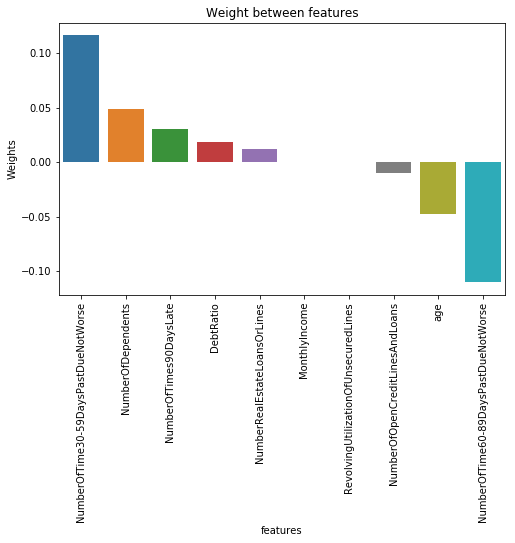

In [10]:
from sklearn import linear_model
import seaborn as sns

weights,params = [],[]
lr = linear_model.LogisticRegression(C=100,random_state=0)
lr.fit(X_train,y_train)
weights=lr.coef_[0]
params.append(1000)
lr.coef_[0]
%matplotlib inline
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (8, 5))
weights_df = pd.DataFrame(weights).T
weights_df.columns = X.columns

weights_df = weights_df.T.sort_values(by = 0,ascending=False)
sns.barplot(weights_df.T.columns,0,data=weights_df)
ax.set_title('Weight between features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Weights',fontsize=10)
ax.set_xlabel('features',fontsize=10)
plt.show()

上图看出来应该是有两个特征基本上没什么贡献。


- 3.使用决策树/SVM/KNN...等sklearn分类算法进行分类，尝试了解参数含义，调整不同的参数。

In [11]:
# Decision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
# y_pred_dt = dt.predict(X=X_test)
dt.feature_importances_


array([0.18783311, 0.11840042, 0.03438639, 0.2021962 , 0.17128909,
       0.07456036, 0.12208033, 0.02496423, 0.02244027, 0.04184961])

In [12]:
# #  SVM
# from sklearn import svm
# svcclf = svm.SVC()
# svcclf.fit(X_train,y_train)
# svcclf.score

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier()
knnclf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

- 4.在测试集上进行预测，计算准确度

In [14]:
# metrics
from sklearn import metrics
test_df = pd.DataFrame(y_test)
test_df["pred"] = lr.predict(X_test)
metrics.accuracy_score(y_true=test_df.SeriousDlqin2yrs.values,y_pred=test_df.pred.values)

# 准确率(accuracy),其定义是: 对于给定的测试数据集，分类器正确分类的样本数与总样本数之比.
# (test_df["SeriousDlqin2yrs"] == test_df["pred"]).sum()/test_df.shape[0]
# 0.9334560515416475

0.9334560515416475

- 5.查看sklearn的官方说明，了解混淆矩阵等评估标准，并对此例进行评估。

[[30406    18]
 [ 2151    20]]


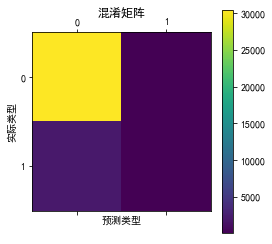

In [15]:
from sklearn.metrics import confusion_matrix
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
cm = confusion_matrix(test_df["SeriousDlqin2yrs"],test_df["pred"])
print(cm)
plt.matshow(cm)
plt.title(u'混淆矩阵')
plt.colorbar()
plt.ylabel(u'实际类型')
plt.xlabel(u'预测类型')
plt.show()

- 6.银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。   
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

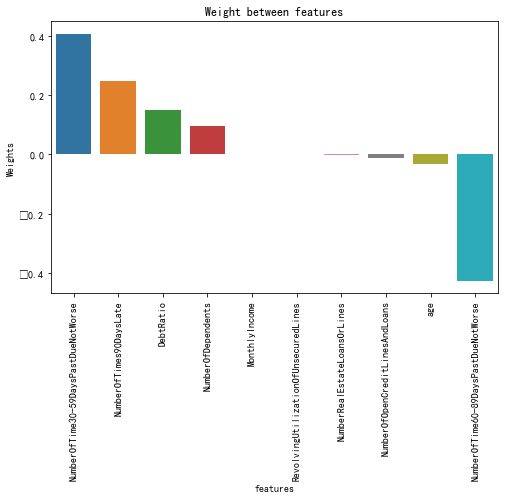

In [16]:
from sklearn import linear_model
import seaborn as sns

weights,params = [],[]
lr = linear_model.LogisticRegression(C=100,random_state=0,class_weight={1:0.7,0:0.3})
lr.fit(X_train,y_train)
weights=lr.coef_[0]
params.append(1000)
lr.coef_[0]
%matplotlib inline
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (8, 5))
weights_df = pd.DataFrame(weights).T
weights_df.columns = X.columns

weights_df = weights_df.T.sort_values(by = 0,ascending=False)
sns.barplot(weights_df.T.columns,0,data=weights_df)
ax.set_title('Weight between features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Weights',fontsize=10)
ax.set_xlabel('features',fontsize=10)
plt.show()


0.9336094493020402
[[30303   121]
 [ 2043   128]]


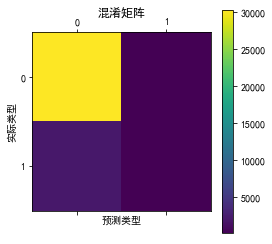

In [17]:
# metrics
from sklearn import metrics
test_df = pd.DataFrame(y_test)
test_df["pred"] = lr.predict(X_test)
print(metrics.accuracy_score(y_true=test_df.SeriousDlqin2yrs.values,y_pred=test_df.pred.values))

from sklearn.metrics import confusion_matrix
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
cm = confusion_matrix(test_df["SeriousDlqin2yrs"],test_df["pred"])
print(cm)
plt.matshow(cm)
plt.title(u'混淆矩阵')
plt.colorbar()
plt.ylabel(u'实际类型')
plt.xlabel(u'预测类型')
plt.show()

- 7.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [ ]:
X_train.drop(["MonthlyIncome","RevolvingUtilizationOfUnsecuredLines","age"],axis = 1,inplace=True)
X_test.drop(["MonthlyIncome","RevolvingUtilizationOfUnsecuredLines","age"],axis = 1,inplace=True)

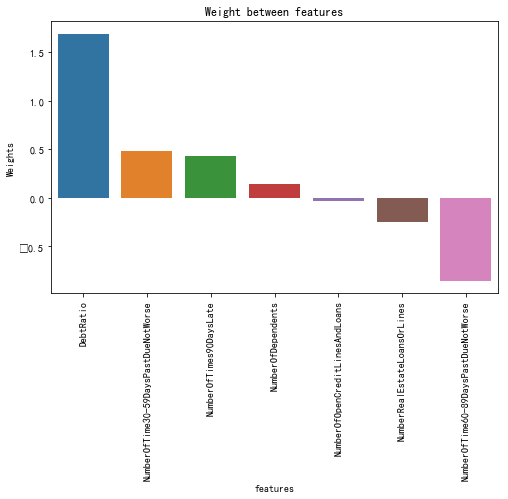

In [19]:
from sklearn import linear_model
import seaborn as sns

weights,params = [],[]
lr = linear_model.LogisticRegression(C=100,random_state=0,class_weight={1:0.7,0:0.3})
lr.fit(X_train,y_train)
weights=lr.coef_[0]
params.append(1000)
lr.coef_[0]
%matplotlib inline
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (8, 5))
weights_df = pd.DataFrame(weights).T
weights_df.columns = X_train.columns

weights_df = weights_df.T.sort_values(by = 0,ascending=False)
sns.barplot(weights_df.T.columns,0,data=weights_df)
ax.set_title('Weight between features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Weights',fontsize=10)
ax.set_xlabel('features',fontsize=10)
plt.show()

In [20]:
# metrics
from sklearn import metrics
test_df = pd.DataFrame(y_test)
test_df["pred"] = lr.predict(X_test)
metrics.accuracy_score(y_true=test_df.SeriousDlqin2yrs.values,y_pred=test_df.pred.values)
# 删掉Age之后有一点点提升。


0.9337935266145114

### 本阶段课程意见反馈题(5分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


很多点没有细化。继续努力吧。

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

挺好，自己跟的有点慢。

<hr>
<center><h1>####答卷结束####</h1></center>